In [17]:
library(rcompanion)
library(ggplot2)

library(dplyr) # for data cleaning
library(ISLR) # for college dataset
library(cluster) # for gower similarity and pam
library(Rtsne) # for t-SNE plot
library(ggplot2) # for visualization

In [18]:
data <- read.csv('Data/cluster_data.csv')

In [19]:
data=data[-c(1,8)]

In [20]:
gower_dist <- daisy(data,
                    metric = "gower")

In [21]:
gower_mat <- as.matrix(gower_dist)

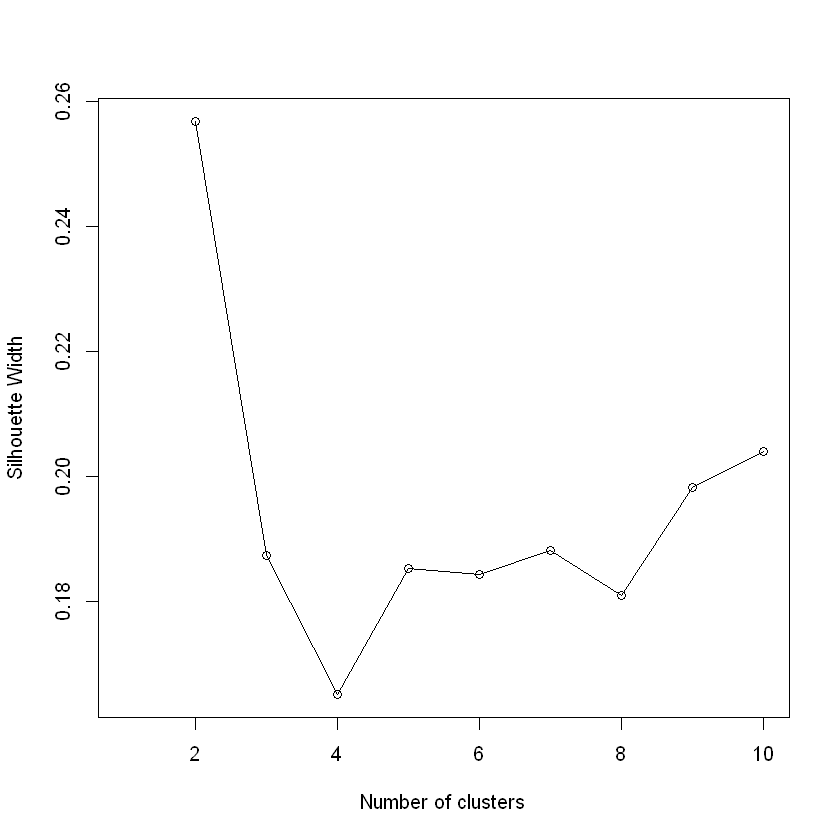

In [22]:
# Calculate silhouette width for many k using PAM

sil_width <- c(NA)

for(i in 2:10){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}

# Plot sihouette width (higher is better)

plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)

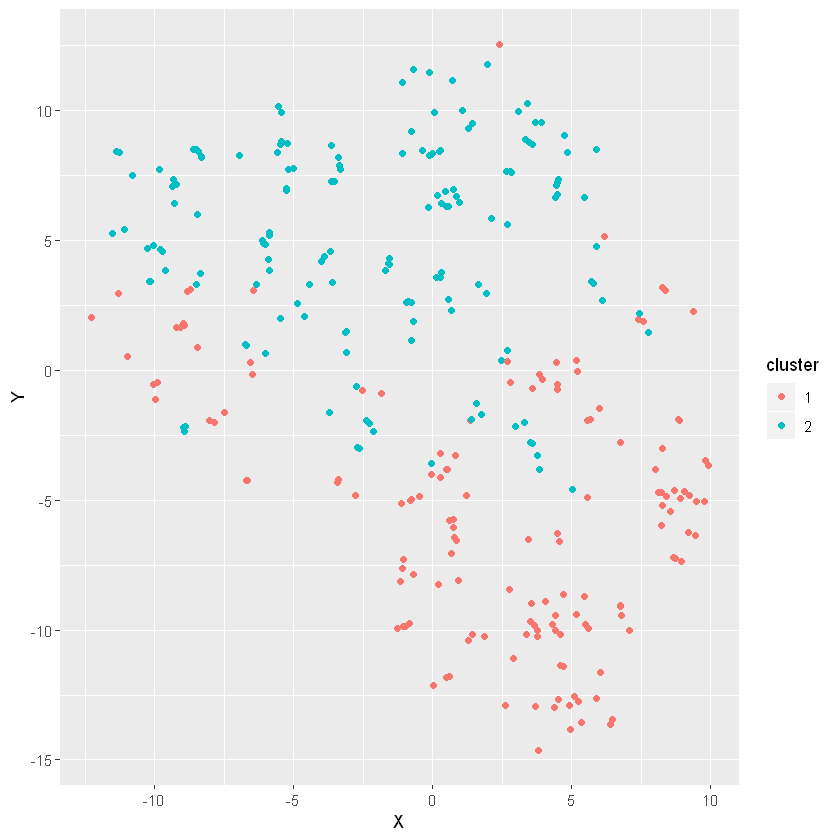

In [24]:
pam_fit <- pam(gower_dist, diss = TRUE, k = 2)

pam_results <- data 

pam_results$cluster <- pam_fit$clustering

tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)

tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))

ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## There are no obvious clusters